Project 1: Zomato sales analysis and visualization 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'zomato (1).csv'
zomato_data = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
print(zomato_data.head())
print(zomato_data.info())


   Unnamed: 0.1  Unnamed: 0     restaurant name restaurant type  \
0             0           0        #FeelTheROLL     Quick Bites   
1             1           1          #L-81 Cafe     Quick Bites   
2             2           2             #refuel            Cafe   
3             3           3  '@ Biryani Central   Casual Dining   
4             4           4          '@ The Bbq   Casual Dining   

   rate (out of 5)  num of ratings  avg cost (two people) online_order  \
0              3.4               7                  200.0           No   
1              3.9              48                  400.0          Yes   
2              3.7              37                  400.0          Yes   
3              2.7             135                  550.0          Yes   
4              2.8              40                  700.0          Yes   

  table booking                                      cuisines type  \
0            No                                          Fast Food   
1           

In [10]:
# Remove unnecessary columns
zomato_data = zomato_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# Handle missing values by dropping rows with any missing data (you can also choose to fill missing values)
zomato_data = zomato_data.dropna()

# Convert data types if necessary (no date columns here, so this is skipped)

# Check for duplicates and remove them
zomato_data = zomato_data.drop_duplicates()

# Display cleaned data
print(zomato_data.head())


      restaurant name restaurant type  rate (out of 5)  num of ratings  \
0        #FeelTheROLL     Quick Bites              3.4               7   
1          #L-81 Cafe     Quick Bites              3.9              48   
2             #refuel            Cafe              3.7              37   
3  '@ Biryani Central   Casual Dining              2.7             135   
4          '@ The Bbq   Casual Dining              2.8              40   

   avg cost (two people) online_order table booking  \
0                  200.0           No            No   
1                  400.0          Yes            No   
2                  400.0          Yes            No   
3                  550.0          Yes            No   
4                  700.0          Yes            No   

                                       cuisines type  \
0                                          Fast Food   
1                               Fast Food, Beverages   
2                                    Cafe, Beverages   


In [12]:
# Total restaurants and cuisines worldwide
total_restaurants = zomato_data['restaurant name'].nunique()
total_cuisines = zomato_data['cuisines type'].nunique()
print(f"Total Restaurants: {total_restaurants}, Total Cuisines: {total_cuisines}")




Total Restaurants: 6984, Total Cuisines: 2155


In [13]:
# Countries with the greatest number of restaurants enrolled in Zomato
country_restaurant_counts = zomato_data['local address'].apply(lambda x: x.split()[-1]).value_counts()
print(country_restaurant_counts)



local address
Road             1108
Nagar             757
Block             522
Whitefield        489
BTM               442
City              403
Marathahalli      378
HSR               372
Indiranagar       282
Jayanagar         217
Bellandur         199
Banashankari      178
Basavanagudi      128
Rajajinagar       125
Malleshwaram      122
Banaswadi         115
Brookefield       104
Town              100
Kammanahalli       96
Layout             79
Ulsoor             78
Domlur             58
Nagawara           56
Yeshwantpur        55
Street             54
Majestic           53
Bommanahalli       46
Thippasandra       45
Kaggadasapura      44
Hennur             41
Seshadripuram      39
Bangalore          39
Ejipura            34
Shivajinagar       33
Garden             31
Market             19
Jalahalli          13
Puram               9
Uttarahalli         7
Koramangala         5
Hebbal              4
Yelahanka           2
Nagarbhavi          1
Peenya              1
Kengeri           

In [14]:
# Cities in India with the greatest number of "value for money restaurants"
# Assuming "value for money" means avg cost < median cost
median_cost = zomato_data['avg cost (two people)'].median()
value_for_money_restaurants = zomato_data[zomato_data['avg cost (two people)'] < median_cost]
city_counts = value_for_money_restaurants['area'].value_counts()
print(city_counts.head())


area
Byresandra,Tavarekere,Madiwala    343
Bannerghatta Road                 246
Banashankari                      211
Brookefield                       192
Malleshwaram                      177
Name: count, dtype: int64


In [15]:

# Top 10 cuisines with the highest number of votes in India
top_cuisines = zomato_data[zomato_data['local address'].str.contains('India')]
top_cuisines = top_cuisines.groupby('cuisines type')['num of ratings'].sum().sort_values(ascending=False).head(10)
print(top_cuisines)



Series([], Name: num of ratings, dtype: int64)


In [16]:
# Countries with restaurants that deliver online
online_delivery_countries = zomato_data[zomato_data['online_order'] == 'Yes']['local address'].apply(lambda x: x.split()[-1]).value_counts()
print(online_delivery_countries)



local address
Road             517
Nagar            425
Block            296
HSR              260
BTM              255
Whitefield       255
Marathahalli     217
City             200
Indiranagar      142
Jayanagar        122
Bellandur        116
Banashankari      78
Basavanagudi      65
Rajajinagar       62
Layout            62
Brookefield       62
Banaswadi         59
Nagawara          53
Malleshwaram      52
Kammanahalli      52
Yeshwantpur       45
Ulsoor            43
Town              36
Kaggadasapura     34
Hennur            28
Bommanahalli      24
Bangalore         19
Thippasandra      19
Street            19
Domlur            19
Ejipura           18
Seshadripuram     12
Shivajinagar      10
Garden             9
Jalahalli          8
Uttarahalli        7
Puram              5
Market             5
Koramangala        3
Majestic           3
Yelahanka          2
Nagarbhavi         1
Hebbal             1
Kengeri            1
Name: count, dtype: int64


In [17]:
# Locality with the most restaurants
locality_restaurant_counts = zomato_data['area'].value_counts()
print(locality_restaurant_counts.head())



area
Byresandra,Tavarekere,Madiwala    794
Bannerghatta Road                 552
Brookefield                       477
Brigade Road                      463
Indiranagar                       450
Name: count, dtype: int64


In [18]:
# Restaurants with good cuisine and an average rating
good_cuisine_restaurants = zomato_data[(zomato_data['rate (out of 5)'] >= 4) & (zomato_data['num of ratings'] > 50)]
print(good_cuisine_restaurants[['restaurant name', 'cuisines type', 'rate (out of 5)', 'num of ratings']])

                   restaurant name                              cuisines type  \
6                          '@Italy                                    Italian   
11              1131 Bar + Kitchen  Continental, Asian, Italian, North Indian   
12       12th Main - Grand Mercure                            European, Asian   
13                   1441 Pizzeria                               Pizza, Salad   
14                  1522 - The Pub         Chinese, Continental, North Indian   
...                            ...                                        ...   
7093  Zhang's - Chinese Restaurant                             Chinese, Momos   
7095                       Zingron                              Chinese, Naga   
7096             Ziyan's Cafe 27th                                     Kerala   
7100                        Zoey's         Cafe, Italian, Continental, Burger   
7101        ZOROY Luxury Chocolate                                   Desserts   

      rate (out of 5)  num 

No data available in top_cuisines for plotting.


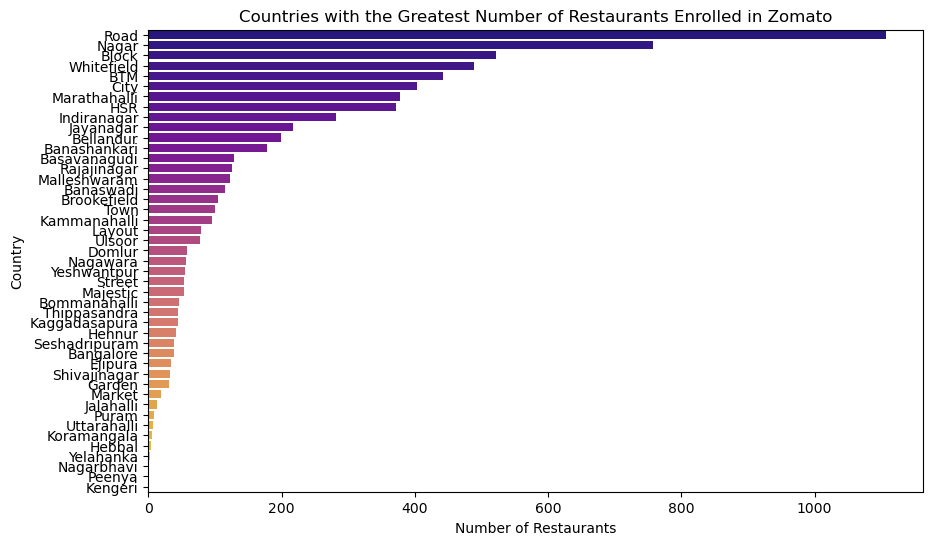

In [22]:

# Visualization: Top 10 cuisines with highest votes
if not top_cuisines.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
    plt.title('Top 10 Cuisines with Highest Number of Votes in India')
    plt.xlabel('Number of Votes')
    plt.ylabel('Cuisine Type')
    plt.show()
else:
    print("No data available in top_cuisines for plotting.")

# Visualization: Countries with the most restaurants
plt.figure(figsize=(10, 6))
sns.barplot(x=country_restaurant_counts.values, y=country_restaurant_counts.index, palette='plasma')
plt.title('Countries with the Greatest Number of Restaurants Enrolled in Zomato')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country')
plt.show()

# Additional visualizations can be created similarly based on other insights
